# TOPIC: EX 6.4: Supervised Machine Learning -Regression Using the World Sustainability Dataset

### Task Contents

#### 1. Importing libraries and data

#### 2. Data cleaning

#### 3. Data prep for regression analysis

#### 4. Regression analysis
    

- Quetions to answer

- Install the scikit-learn library.

- Import the libraries you need into a new notebook, including any necessary modules from scikit-learn.


- Clean your data so that it’s ready for analysis.


- Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.


- State your hypothesis in a markdown cell within your Jupyter notebook.


- Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.


Split the data into two sets: a training set and a test set.


- Run a linear regression on the data.
First, fit the model you created to the training set.
Then, create a prediction for y on the test set.


- Create a plot that shows the regression line on the test set.


- Write your own interpretation of how well the line appears to fit the data in a markdown cell.


- Check the model performance statistics—MSE and R2 score.


- Compare the predicted y values with the actual y values in a dataframe.


- Include your thoughts on how well the model performed on the test set in a markdown cell.
Include any reflections you have on the impact of possible data bias.


- Save your notebook and submit it for your tutor to review.

### 1 - 2 . Importing libraries and data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# This ensures charts created are displayed in the notebook without the need to recall them specifically at anytime.

%matplotlib inline

In [12]:
#Creating a path for this project

file_path = r"D:\career Foundary\Data_immersion\6_self data\World Sustainability Dataset project"

In [13]:
# loading the required data data

WorldSustainabilityDataset_N=pd.read_csv(os.path.join(file_path, '02 Data', 'Prepared data', 'WorldSustainabilityDataset_N.csv'), index_col = False)

### 2. Data Cleaning

In [14]:
WorldSustainabilityDataset_N.head()

,Unnamed: 0,Country Name,Country Code,Year,Access to electricity (% of population) - EG.ELC.ACCS.ZS,Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG,"Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS",Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS,Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS,Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS,...,Gini index (World Bank estimate) - SI.POV.GINI,Income Classification (World Bank Definition),Individuals using the Internet (% of population) - IT.NET.USER.ZS,"Life expectancy at birth, total (years) - SP.DYN.LE00.IN","Population, total - SP.POP.TOTL",Regime Type (RoW Measure Definition),Rural population (% of total population) - SP.RUR.TOTL.ZS,Total natural resources rents (% of GDP) - NY.GDP.TOTL.RT.ZS,Urban population (% of total population) - SP.URB.TOTL.IN.ZS,World Regions (UN SDG Definition)
0,0,Aruba,ABW,2000,91.660398,NaN,15.392211,2.389134,0.000190,0.000190,...,NaN,High income,NaN,NaN,NaN,NaN,53.283,NaN,NaN,Latin America and Caribbean
1,1,Aruba,ABW,2001,100.000000,NaN,11.491930,2.509046,0.000214,0.000214,...,NaN,High income,17.1,73.853,92892.0,NaN,53.661,0.000712,46.339,Latin America and Caribbean
2,2,Aruba,ABW,2002,100.000000,NaN,3.893620,2.721385,0.000223,0.000223,...,NaN,High income,18.8,73.937,94992.0,NaN,54.028,0.000657,45.972,Latin America and Caribbean
3,3,Aruba,ABW,2003,100.000000,NaN,6.713863,2.733676,0.000243,0.000243,...,NaN,High income,20.8,74.038,97016.0,NaN,54.394,0.000700,45.606,Latin America and Caribbean
4,4,Aruba,ABW,2004,100.000000,NaN,9.801576,2.678363,0.000256,0.000256,...,NaN,High income,23.0,74.156,98744.0,NaN,54.760,0.000685,45.240,Latin America and Caribbean


In [59]:
WorldSustainabilityDataset_N.shape

(3287, 55)

In [99]:
WorldSustainabilityDataset_N.isnull().sum()

Unnamed: 0                                                                                         0
Country Name                                                                                       0
Country Code                                                                                       0
Year                                                                                               0
Access to electricity (% of population) - EG.ELC.ACCS.ZS                                          94
Adjusted net national income per capita (annual % growth) - NY.ADJ.NNTY.PC.KD.ZG                 721
Adjusted net savings, excluding particulate emission damage (% of GNI) - NY.ADJ.SVNX.GN.ZS       659
Adjusted savings: carbon dioxide damage (% of GNI) - NY.ADJ.DCO2.GN.ZS                            67
Adjusted savings: natural resources depletion (% of GNI) - NY.ADJ.DRES.GN.ZS                     193
Adjusted savings: net forest depletion (% of GNI) - NY.ADJ.DFOR.GN.ZS                      

In [100]:
WorldSustainabilityDataset_N.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 55 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Unnamed: 0                                                                                    3287 non-null   int64  
 1   Country Name                                                                                  3287 non-null   object 
 2   Country Code                                                                                  3287 non-null   object 
 3   Year                                                                                          3287 non-null   int64  
 4   Access to electricity (% of population) - EG.ELC.ACCS.ZS                                      3193 non-null   float64
 5   Adjusted net national incom

In [140]:
WorldSustainabilityDataset_N["Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1"].isna()

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27      False
28       True
29       True
30       True
31       True
32       True
33       True
34       True
35       True
36       True
37      False
38       True
39       True
40      False
41       True
42       True
43      False
44       True
45       True
46      False
47       True
48       True
49       True
50      False
51       True
52      False
53      False
54      False
55      False
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64       True
65       True
66       True
67       True
68       True
69       True
70      False
71    

In [141]:
# Dropped the Unnamed column 

WorldSustainabilityDataset_NE = WorldSustainabilityDataset_N.drop(['Unnamed: 0'],axis = 1)


In [142]:
# Dropped the columns not needed for the analysis to answer our proposed questions and a subset

WorldSustainabilityDataset_NEW = WorldSustainabilityDataset_N[["Country Name", "Year", "Gini index (World Bank estimate) - SI.POV.GINI", "Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS", "Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1", "Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1", "World Regions (UN SDG Definition)", "Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes", "Children out of school (% of primary school age) - SE.PRM.UNER.ZS" ]]

In [143]:
# Check column headers

WorldSustainabilityDataset_NEW.columns

Index(['Country Name', 'Year',
       'Gini index (World Bank estimate) - SI.POV.GINI',
       'Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS',
       'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1',
       'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1',
       'World Regions (UN SDG Definition)',
       'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes',
       'Children out of school (% of primary school age) - SE.PRM.UNER.ZS'],
      dtype='object')

In [144]:
# check the data for prview

WorldSustainabilityDataset_NEW.head()

,Country Name,Year,Gini index (World Bank estimate) - SI.POV.GINI,"Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS",Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1,Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1,World Regions (UN SDG Definition),"Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes",Children out of school (% of primary school age) - SE.PRM.UNER.ZS
0,Aruba,2000,NaN,97.142860,NaN,NaN,Latin America and Caribbean,2.378,1.60268
1,Aruba,2001,NaN,94.404068,NaN,NaN,Latin America and Caribbean,2.407,0.32258
2,Aruba,2002,NaN,94.755241,NaN,NaN,Latin America and Caribbean,2.437,1.81634
3,Aruba,2003,NaN,90.215919,NaN,NaN,Latin America and Caribbean,2.561,3.32156
4,Aruba,2004,NaN,90.559898,NaN,NaN,Latin America and Caribbean,2.616,2.17652


In [145]:
#Check the size of df

WorldSustainabilityDataset_NEW.shape

(3287, 9)

In [146]:
# Rename the subset columns whose names are too long for clearity and readability

WorldSustainabilityDataset_NEW.rename(columns = {'Gini index (World Bank estimate) - SI.POV.GINI' : 'Gini index', 'Primary completion rate, total (% of relevant age group) - SE.PRM.CMPT.ZS': '% total Primary Edu completion rate', 
                     'Proportion of population below international poverty line (%) - SI_POV_DAY1 - 1.1.1': '% pop.below poverty line', 'Proportion of population using basic drinking water services (%) - SP_ACS_BSRVH2O - 1.4.1': 'population with basic drinking water',
                     'World Regions (UN SDG Definition)': 'World Regions', 'Annual production-based emissions of carbon dioxide (CO2), measured in million tonnes' : 'CO2 emissions (M.tonnes)', 'Children out of school (% of primary school age) - SE.PRM.UNER.ZS' : '% of primary school age Children out of school' },
                      inplace = True)

C:\Users\paulg\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [148]:
# Select only the necessary columns and put them in a list called columns

columns = ["Year",
           "Country Name",
           '% pop.below poverty line',
           "CO2 emissions (M.tonnes)"]

In [172]:
# created a new data frame for the the selected columns
df_N = WorldSustainabilityDataset_NEW[columns]
df_N.head(100)

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
0,2000,Aruba,NaN,2.378
1,2001,Aruba,NaN,2.407
2,2002,Aruba,NaN,2.437
3,2003,Aruba,NaN,2.561
4,2004,Aruba,NaN,2.616
5,2005,Aruba,NaN,2.719
6,2006,Aruba,NaN,2.715
7,2007,Aruba,NaN,2.821
8,2008,Aruba,NaN,2.656
9,2009,Aruba,NaN,2.627


### check for and fixed Missing values

In [173]:
# I want drop all rows of ""% pop.below poverty line" where value is NAN.

df_NE = df_N[df_N["% pop.below poverty line"].notna()]
df_NE

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
19,2000,Angola,36.4,9.515
27,2008,Angola,34.4,25.486
37,2018,Angola,49.9,37.679
40,2002,Albania,1.6,3.748
43,2005,Albania,0.9,4.199
46,2008,Albania,0.3,4.272
50,2012,Albania,0.8,4.668
52,2014,Albania,1.6,5.621
53,2015,Albania,1.1,4.532
54,2016,Albania,0.9,4.496


In [176]:
#created a frequency countof the countries

country_counts = df_NE["Country Name"].value_counts()
country_counts

Dominican Republic          19
Moldova                     19
Belarus                     19
Costa Rica                  19
Russian Federation          19
Georgia                     19
Kyrgyz Republic             19
El Salvador                 19
Peru                        19
United States               19
Panama                      19
Indonesia                   19
Uruguay                     19
Paraguay                    18
Armenia                     18
Argentina                   18
Kazakhstan                  18
United Kingdom              18
Honduras                    18
Brazil                      17
Sweden                      17
Austria                     17
Greece                      17
Bolivia                     17
Ecuador                     17
France                      17
Germany                     17
Luxembourg                  17
Norway                      17
Spain                       17
Colombia                    17
Turkey                      17
Denmark 

In [177]:
keep_countries = list(country_counts[country_counts >= 13].index)
print (keep_countries)

['Dominican Republic', 'Moldova', 'Belarus', 'Costa Rica', 'Russian Federation', 'Georgia', 'Kyrgyz Republic', 'El Salvador', 'Peru', 'United States', 'Panama', 'Indonesia', 'Uruguay', 'Paraguay', 'Armenia', 'Argentina', 'Kazakhstan', 'United Kingdom', 'Honduras', 'Brazil', 'Sweden', 'Austria', 'Greece', 'Bolivia', 'Ecuador', 'France', 'Germany', 'Luxembourg', 'Norway', 'Spain', 'Colombia', 'Turkey', 'Denmark', 'Belgium', 'Ukraine', 'Finland', 'Ireland', 'Thailand', 'Estonia', 'Italy', 'Portugal', 'Czech Republic', 'Iceland', 'Cyprus', 'Lithuania', 'Poland', 'Latvia', 'Slovenia', 'Hungary', 'Netherlands', 'Switzerland', 'Slovak Republic', 'Bulgaria', 'Romania', 'Malta']


In [174]:
#filtered_df = df_NE[df_NE["Country Name"].isin(keep_countries)]
#filtered_df

#df = filtered_df.groupby('Country Name').count()
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

#df

In [178]:
filtered_df_2 = df_N[df_N["Country Name"].isin(keep_countries)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


filtered_df_2

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes)
76,2000,Argentina,6.8,142.358
77,2001,Argentina,10.7,134.004
78,2002,Argentina,16.9,124.392
79,2003,Argentina,7.9,134.631
80,2004,Argentina,5.7,157.043
81,2005,Argentina,4.2,161.434
82,2006,Argentina,3.3,174.609
83,2007,Argentina,2.6,174.246
84,2008,Argentina,2.5,188.106
85,2009,Argentina,2.3,178.949


In [179]:
Grouped_data = filtered_df_2.groupby('Country Name')
Grouped_data

In [180]:
filtered_df_2['% poverty line'] = Grouped_data['% pop.below poverty line'].fillna(Grouped_data['% pop.below poverty line'].transform('mean'))

<ipython-input-180-c320bdb018db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2['% poverty line'] = Grouped_data['% pop.below poverty line'].fillna(Grouped_data['% pop.below poverty line'].transform('mean'))


In [181]:
filtered_df_2

,Year,Country Name,% pop.below poverty line,CO2 emissions (M.tonnes),% poverty line
76,2000,Argentina,6.8,142.358,6.800000
77,2001,Argentina,10.7,134.004,10.700000
78,2002,Argentina,16.9,124.392,16.900000
79,2003,Argentina,7.9,134.631,7.900000
80,2004,Argentina,5.7,157.043,5.700000
81,2005,Argentina,4.2,161.434,4.200000
82,2006,Argentina,3.3,174.609,3.300000
83,2007,Argentina,2.6,174.246,2.600000
84,2008,Argentina,2.5,188.106,2.500000
85,2009,Argentina,2.3,178.949,2.300000


In [182]:
# Checked for missing values

filtered_df_2.isnull().sum()

Year                          0
Country Name                  0
% pop.below poverty line    116
CO2 emissions (M.tonnes)      0
% poverty line                0
dtype: int64

In [183]:
Emission_by_countries = filtered_df_2.drop(['% pop.below poverty line'],axis = 1)

In [184]:
# drop the column for "% pop.below poverty line" because we have filled the NAN values
Emission_by_countries.head()

,Year,Country Name,CO2 emissions (M.tonnes),% poverty line
76,2000,Argentina,142.358,6.8
77,2001,Argentina,134.004,10.7
78,2002,Argentina,124.392,16.9
79,2003,Argentina,134.631,7.9
80,2004,Argentina,157.043,5.7


In [187]:
# check for data types

Emission_by_countries.dtypes

Year                          int64
Country Name                 object
CO2 emissions (M.tonnes)    float64
% poverty line              float64
dtype: object

In [188]:
Emission_by_countries['Year'] = Emission_by_countries['Year'].apply(str)

In [189]:
Emission_by_countries.dtypes

Year                         object
Country Name                 object
CO2 emissions (M.tonnes)    float64
% poverty line              float64
dtype: object

In [190]:
# Checking data types for consistencies

for col in Emission_by_countries.columns.tolist():
    Different_data_types = (Emission_by_countries[[col]].applymap(type) != Emission_by_countries[[col]].iloc[0].apply(type)).any(axis = 1)
    if len (Emission_by_countries[ Different_data_types]) > 0:
        print (col, ' MIXED')
    else: print(col, ' CONSISTENT')

Year  CONSISTENT
Country Name  CONSISTENT
CO2 emissions (M.tonnes)  CONSISTENT
% poverty line  CONSISTENT


### Duplicates check

In [ ]:
# no duplicates
Emission_by_countries.duplicated()

In [192]:
Emission_by_countries.shape

(1045, 4)

### Extreme values checks¶

C:\Users\paulg\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CO2 emissions (M.tonnes)', ylabel='Density'>

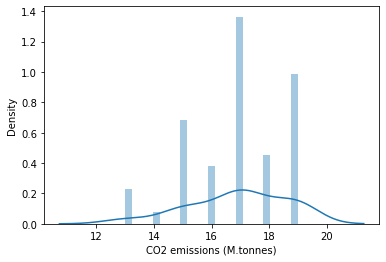

In [193]:
sns.distplot(df['CO2 emissions (M.tonnes)'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [194]:
Emission_by_countries['CO2 emissions (M.tonnes)'].mean() # Check the mean

249.18086794258355

In [195]:
Emission_by_countries['CO2 emissions (M.tonnes)'].median() # Check the median

48.194

In [196]:
Emission_by_countries['CO2 emissions (M.tonnes)'].max() # Check the max

6131.893

In [197]:
Emission_by_countries.describe()

,CO2 emissions (M.tonnes),% poverty line
count,1045.000000,1045.000000
mean,249.180868,2.860090
std,789.920468,5.285934
min,1.399000,0.000000
25%,9.952000,0.100000
50%,48.194000,0.600000
75%,190.930000,2.900000
max,6131.893000,35.100000


In [201]:
Emission_by_countries.columns

Index(['Year', 'Country Name', 'CO2 emissions (M.tonnes)', '% poverty line'], dtype='object')

In [ ]:
#### Hypothesis 1: If a sneaker has a retail price of 220 it will sell for a low price.

### 4. Data prep for regression analysis
Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

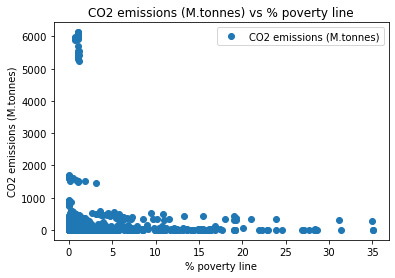

In [204]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

Emission_by_countries.plot(y = 'CO2 emissions (M.tonnes)', x='% poverty line',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('CO2 emissions (M.tonnes) vs % poverty line')  
plt.ylabel('CO2 emissions (M.tonnes)')  
plt.xlabel('% poverty line')  
plt.show()

### 5. State your hypothesis in a markdown cell within your Jupyter notebook.

If the percentage of Population of the people below the poverty line get lower, the CO2 emmission of the country from production will increase. 

### 6. Reshape the variables into NumPy arrays

In [205]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = Emission_by_countries['% poverty line'].values.reshape(-1,1)
y = Emission_by_countries['CO2 emissions (M.tonnes)'].values.reshape(-1,1)

In [206]:
X

array([[ 6.8],
       [10.7],
       [16.9],
       ...,
       [ 1. ],
       [ 1.2],
       [ 1. ]])

In [207]:
y

array([[ 142.358],
       [ 134.004],
       [ 124.392],
       ...,
       [5292.268],
       [5253.606],
       [5424.882]])

### 7. Split the data into two sets: a training set and a test set.

In [208]:
# Split data into a training set and a test set.  Using test_train_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)


### 8. Running Regression Analysis model

In [209]:
# Create regression object, # This is the regression object,will be fitted onto the training set.

regression = LinearRegression()

In [210]:
# Fit the regression to the training set of each variable which willthen trains the model.

regression.fit(X_train, y_train)

LinearRegression()

In [213]:
# This will apply model to x_test data to predict for y variables
y_predicted = regression.predict(X_test)

### 9. Creating a plot that shows the regression line on the test set.

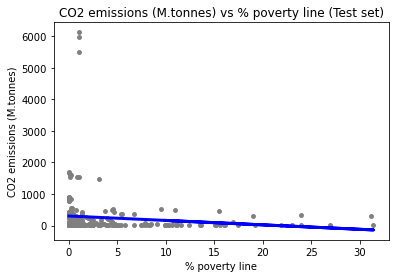

In [215]:
# A plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('CO2 emissions (M.tonnes) vs % poverty line (Test set)')
plot_test.xlabel('% poverty line')
plot_test.ylabel('CO2 emissions (M.tonnes)')
plot_test.show()

In [216]:

# Created an objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted)             # This is the R2 score.

In [217]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-14.04942979]]
Mean squared error:  401414.1347880505
R2 score:  0.00221790132436106


#### 10. The line does not fit the data well enough 
It is clear that the data points are far from the trend line, which indicates that it seems there are not a linear relationship between both variables, CO2 emissions (M.tonnes) and % poverty line. 
from the the model result, there is a large Mean squared error regarding the data we have and the R2 score is 0.0022 only, indicating a poor fitting of the relationship that exist between the variable with a negative correlation. 
In this case we will have to disregard the proposed hypothesis because It seems that we are not able to say that as a people are lifted from poverty, so will the CO2 increases for a country with all certainity

In [218]:
y_predicted

array([[ 301.95026594],
       [ 297.73543701],
       [ 112.28296382],
       [ 280.87612126],
       [ 272.44646339],
       [ 299.14037998],
       [ 238.7278319 ],
       [ 300.54532296],
       [ 283.68600722],
       [ 301.95026594],
       [ 269.63657743],
       [  75.75444637],
       [ 291.67662041],
       [ 234.51300296],
       [ 276.66129233],
       [ 299.4709548 ],
       [ 296.02943482],
       [ 292.11566509],
       [ 147.40653829],
       [ 262.61186254],
       [ 289.30577913],
       [ 293.52060807],
       [ 271.04152041],
       [ 301.95026594],
       [ 226.08334509],
       [ 151.62136722],
       [ 299.14037998],
       [ 289.30577913],
       [ 301.95026594],
       [  89.80387616],
       [ 301.95026594],
       [ 299.14037998],
       [ 300.54532296],
       [ 268.23163445],
       [ 301.95026594],
       [ 300.54532296],
       [ 287.90083615],
       [ 294.92555105],
       [ 282.28106424],
       [ 301.37176001],
       [ 298.23129923],
       [ 301.950

In [220]:
# Create a dataframe comparing the actual and predicted values of y.

df_data_outcome = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_data_outcome.head(20)

,Actual,Predicted
0,899.780,301.950266
1,5.947,297.735437
2,28.263,112.282964
3,6.018,280.876121
4,55.078,272.446463
5,494.294,299.140380
6,531.012,238.727832
7,332.670,300.545323
8,45.774,283.686007
9,303.953,301.950266


#### The summary statistics of the model confirm that the model is inaccurate.  Which can also be seen by the variance in the actual vs predicted values.  An R2 score of  0.0022 indicates a very poor fit and the large MSE also confirms this.  

#### Compare how the regression fits the training set

In [221]:
# Predict on the training set

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [222]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [223]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-14.04942979]]
Mean squared error:  712265.0996060077
R2 score:  0.0077185326344587635


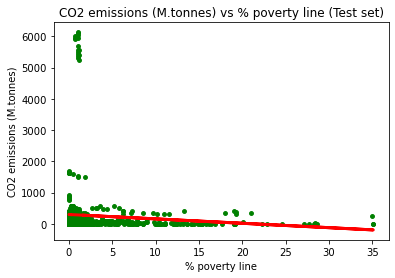

In [224]:

# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('CO2 emissions (M.tonnes) vs % poverty line (Test set)')
plot_test.xlabel('% poverty line')
plot_test.ylabel('CO2 emissions (M.tonnes)')
plot_test.show()



#### The models outcome on the training set is very similar to that on the test set.  With the MSE being even larger on the train set.  Confirming that this is not a good model that is reliable and decreasing % population of people in poverty is not the driving force for CO2 emmissions.